In [1]:
# Import data science environment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import sklearn
from sklearn import linear_model
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('white')

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='internal gelsd'
)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Load the data file.
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv', skiprows=3, header=1)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [3]:
# Rename column headings.
df.rename(columns={
    "Murder and\nnonneligent\nmanslaughter":"Murder",
    "Rape\n(revised\ndefinition)1":"Rape",
    "Rape\n(legacy\ndefinition)2":"Rape2",
    "Aggravated\nassault":"Aggravated_Assault",
    "Property\ncrime":"Property_Crime",
    "Larceny-\ntheft":"Larceny",
    "Motor\nvehicle\ntheft":"Motor_Vehicle",
    "Arson3":"Arson"
})

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Rape2,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny,Motor_Vehicle,Arson
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000


In [4]:
# View column names, size, types, and tendencies.
print(df.columns)
print(df.shape)
print(df.dtypes)
df.describe()

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')
(351, 13)
City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object


,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000,0.000,187.000
mean,1.566,nan,1.872
std,18.304,nan,10.693
min,0.000,nan,0.000
25%,0.000,nan,0.000
50%,0.000,nan,0.000
75%,0.000,nan,1.000
max,335.000,nan,132.000


In [5]:
# Eliminate commas from numbers > 999.
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted

In [6]:
# Convert object types to floats.
df['Population'] = df['Population'].apply(lambda x: convert_number(x))
df['Population^2'] = df['Population']**2
df['Violent_Crime'] = df['Violent\ncrime'].apply(lambda x: convert_number(x))
df['Murder'] = df['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: convert_number(x))
df['Rape'] = df['Rape\n(revised\ndefinition)1'].apply(lambda x: convert_number(x))
df['Rape2'] = df['Rape\n(legacy\ndefinition)2'].apply(lambda x: convert_number(x))
df['Robbery'] = df['Robbery'].apply(lambda x: convert_number(x))
df['Aggravated_Assault'] = df['Aggravated\nassault'].apply(lambda x: convert_number(x))
df['Property_Crime'] = df['Property\ncrime'].apply(lambda x: convert_number(x))
df['Burglary'] = df['Burglary'].apply(lambda x: convert_number(x))
df['Larceny'] = df['Larceny-\ntheft'].apply(lambda x: convert_number(x))
df['Motor_Vehicle'] = df['Motor\nvehicle\ntheft'].apply(lambda x: convert_number(x))
df['Arson'] = df['Arson3'].apply(lambda x: convert_number(x))

In [7]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,...,Population^2,Violent_Crime,Murder,Rape,Rape2,Aggravated_Assault,Property_Crime,Larceny,Motor_Vehicle,Arson
0,Adams Village,1861.000,0,0.000,nan,0,0.000,0,12,2.000,...,3463321.000,0.000,0.000,nan,0.000,0.000,12.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3,0.000,nan,0,0.000,3,24,3.000,...,6640929.000,3.000,0.000,nan,0.000,3.000,24.000,20.000,1.000,0.000
2,Akron Village,2846.000,3,0.000,nan,0,0.000,3,16,1.000,...,8099716.000,3.000,0.000,nan,0.000,3.000,16.000,15.000,0.000,0.000
3,Albany,97956.000,791,8.000,nan,30,227.000,526,"4,090",705.000,...,9595377936.000,791.000,8.000,nan,30.000,526.000,4090.000,3243.000,142.000,nan
4,Albion Village,6388.000,23,0.000,nan,3,4.000,16,223,53.000,...,40806544.000,23.000,0.000,nan,3.000,16.000,223.000,165.000,5.000,nan


In [8]:
# Create new data frame with only relevant columns.
df_fbi = df[['Population', 'Population^2', 'Violent_Crime', 'Murder', 'Rape2',
             'Property_Crime', 'Larceny', 'Aggravated_Assault', 'Motor_Vehicle', 'Arson']]

In [9]:
df_fbi.tail()

,Population,Population^2,Violent_Crime,Murder,Rape2,Property_Crime,Larceny,Aggravated_Assault,Motor_Vehicle,Arson
346,199134.000,39654349956.000,1036.000,6.000,25.000,2368.000,1662.000,615.000,236.000,10.000
347,36643.000,1342709449.000,15.000,0.000,0.000,334.000,287.000,13.000,2.000,nan
348,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
349,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
350,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [10]:
# Eliminate the last three rows of the data frame.
df_fbi = df_fbi[:348]
df_fbi.tail()

,Population,Population^2,Violent_Crime,Murder,Rape2,Property_Crime,Larceny,Aggravated_Assault,Motor_Vehicle,Arson
343,10685.000,114169225.000,3.000,0.000,0.000,541.000,529.000,1.000,3.000,nan
344,829.000,687241.000,7.000,0.000,0.000,17.000,9.000,7.000,0.000,0.000
345,5931.000,35176761.000,2.000,0.000,0.000,58.000,45.000,2.000,0.000,nan
346,199134.000,39654349956.000,1036.000,6.000,25.000,2368.000,1662.000,615.000,236.000,10.000
347,36643.000,1342709449.000,15.000,0.000,0.000,334.000,287.000,13.000,2.000,nan


In [11]:
# Change NaN values to 0.
df_fbi.dropna(inplace=True)
df_fbi.head()

,Population,Population^2,Violent_Crime,Murder,Rape2,Property_Crime,Larceny,Aggravated_Assault,Motor_Vehicle,Arson
0,1861.000,3463321.000,0.000,0.000,0.000,12.000,10.000,0.000,0.000,0.000
1,2577.000,6640929.000,3.000,0.000,0.000,24.000,20.000,3.000,1.000,0.000
2,2846.000,8099716.000,3.000,0.000,0.000,16.000,15.000,3.000,0.000,0.000
6,1781.000,3171961.000,3.000,0.000,0.000,10.000,10.000,3.000,0.000,0.000
7,118296.000,13993943616.000,107.000,1.000,7.000,2118.000,1882.000,68.000,32.000,3.000


In [12]:
# Show null column counts.
null_columns = df_fbi.columns[df_fbi.isnull().any()]
df_fbi[null_columns].isnull().sum()

Series([], dtype: float64)

In [13]:
# Eliminate two columns from data frame.
df_fbi = df[['Population', 'Violent_Crime', 'Murder', 'Rape2', 'Property_Crime',
             'Larceny', 'Aggravated_Assault', 'Motor_Vehicle']]

In [14]:
df_fbi.head()

,Population,Violent_Crime,Murder,Rape2,Property_Crime,Larceny,Aggravated_Assault,Motor_Vehicle
0,1861.000,0.000,0.000,0.000,12.000,10.000,0.000,0.000
1,2577.000,3.000,0.000,0.000,24.000,20.000,3.000,1.000
2,2846.000,3.000,0.000,0.000,16.000,15.000,3.000,0.000
3,97956.000,791.000,8.000,30.000,4090.000,3243.000,526.000,142.000
4,6388.000,23.000,0.000,3.000,223.000,165.000,16.000,5.000


In [15]:
df_fbi.tail()

,Population,Violent_Crime,Murder,Rape2,Property_Crime,Larceny,Aggravated_Assault,Motor_Vehicle
346,199134.000,1036.000,6.000,25.000,2368.000,1662.000,615.000,236.000
347,36643.000,15.000,0.000,0.000,334.000,287.000,13.000,2.000
348,nan,nan,nan,nan,nan,nan,nan,nan
349,nan,nan,nan,nan,nan,nan,nan,nan
350,nan,nan,nan,nan,nan,nan,nan,nan


In [16]:
# Eliminate last three rows again.
df_fbi = df_fbi[:348]
df_fbi.tail()

,Population,Violent_Crime,Murder,Rape2,Property_Crime,Larceny,Aggravated_Assault,Motor_Vehicle
343,10685.000,3.000,0.000,0.000,541.000,529.000,1.000,3.000
344,829.000,7.000,0.000,0.000,17.000,9.000,7.000,0.000
345,5931.000,2.000,0.000,0.000,58.000,45.000,2.000,0.000
346,199134.000,1036.000,6.000,25.000,2368.000,1662.000,615.000,236.000
347,36643.000,15.000,0.000,0.000,334.000,287.000,13.000,2.000


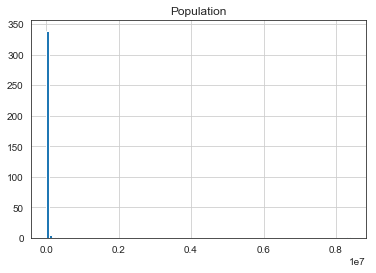

Median  7233.5
Std  450037.3675209857
Outliers above  907308.2350419714


In [17]:
# Check for outliers, central tendencies.
df_fbi['Population'].hist(bins=100)
plt.title('Population')
plt.show()

median = df_fbi['Population'].median()
std = df_fbi['Population'].std()
pop_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', pop_out)

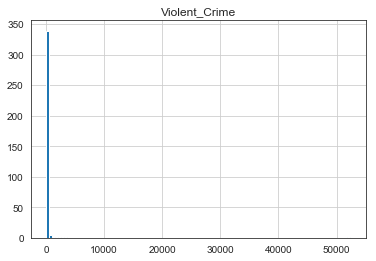

Median  6.0
Std  2815.268503874344
Outliers above  5636.537007748688


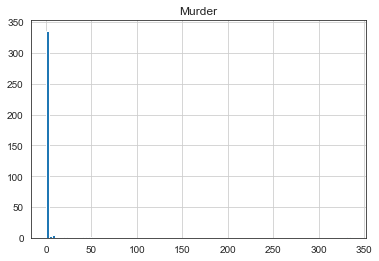

Median  0.0
Std  18.303672792887753
Outliers above  36.607345585775505


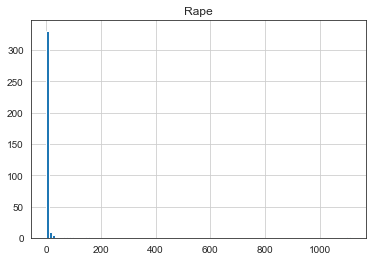

Median  0.0
Std  60.42545249494281
Outliers above  120.85090498988562


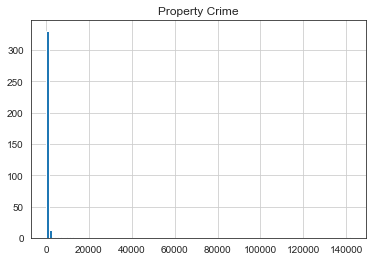

Median  112.5
Std  7659.724745633149
Outliers above  15431.949491266298


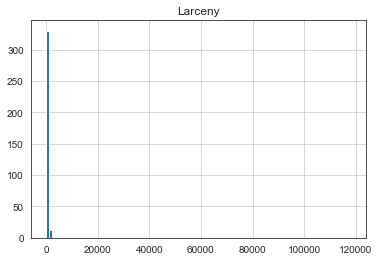

Median  94.0
Std  6346.054450525858
Outliers above  12786.108901051715


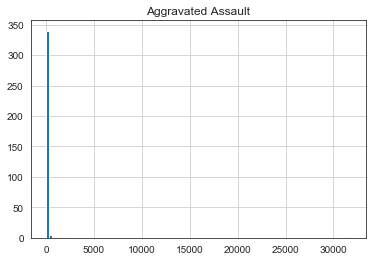

Median  4.0
Std  1706.1317296663026
Outliers above  3416.263459332605


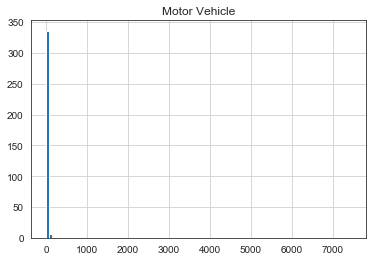

Median  2.0
Std  403.42382612956703
Outliers above  808.8476522591341


In [18]:
# Create function to find outliers, central tendencies.
data = df_fbi

def outlier_transform():
    for column in data:
        df_fbi[column].hist(bins=100)
        plt.title(column)
        plt.show()
        median = df_fbi[column].median()
        std = df_fbi(column).std()
        out = median + 2 * std
        print('Median ', median)
        print('Std ', std)
        print('Outliers above ', out)

# Check for outliers, central tendencies for other variables.
df_fbi['Violent_Crime'].hist(bins=100)
plt.title('Violent_Crime')
plt.show()

median = df_fbi['Violent_Crime'].median()
std = df_fbi['Violent_Crime'].std()
vc_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', vc_out)

df_fbi['Murder'].hist(bins=100)
plt.title('Murder')
plt.show()

median = df_fbi['Murder'].median()
std = df_fbi['Murder'].std()
mur_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', mur_out)

df_fbi['Rape2'].hist(bins=100)
plt.title('Rape')
plt.show()

median = df_fbi['Rape2'].median()
std = df_fbi['Rape2'].std()
rape_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', rape_out)

df_fbi['Property_Crime'].hist(bins=100)
plt.title('Property Crime')
plt.show()

median = df_fbi['Property_Crime'].median()
std = df_fbi['Property_Crime'].std()
prop_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', prop_out)

df_fbi['Larceny'].hist(bins=100)
plt.title('Larceny')
plt.show()

median = df_fbi['Larceny'].median()
std = df_fbi['Larceny'].std()
larc_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', larc_out)

df_fbi['Aggravated_Assault'].hist(bins=100)
plt.title('Aggravated Assault')
plt.show()

median = df_fbi['Aggravated_Assault'].median()
std = df_fbi['Aggravated_Assault'].std()
agg_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', agg_out)

df_fbi['Motor_Vehicle'].hist(bins=100)
plt.title('Motor Vehicle')
plt.show()

median = df_fbi['Motor_Vehicle'].median()
std = df_fbi['Motor_Vehicle'].std()
mv_out = median + 2 * std

print('Median ', median)
print('Std ', std)
print('Outliers above ', mv_out)

In [19]:
# Dealing with outliers (create a ceiling value for outliers).
df_fbi['Population'] = df_fbi['Population'].map(lambda x: x if x < pop_out else 907000)
df_fbi['Violent_Crime'] = df_fbi['Violent_Crime'].map(lambda x: x if x < vc_out else 5600)
df_fbi['Murder'] = df_fbi['Murder'].map(lambda x: x if x < mur_out else 36)
df_fbi['Rape2'] = df_fbi['Rape2'].map(lambda x: x if x < rape_out else 120)
df_fbi['Property_Crime'] = df_fbi['Property_Crime'].map(lambda x: x if x < prop_out else 15400)
df_fbi['Larceny'] = df_fbi['Larceny'].map(lambda x: x if x < larc_out else 12700)
df_fbi['Aggravated_Assault'] = df['Aggravated_Assault'].map(lambda x: x if x < agg_out else 3400)
df_fbi['Motor_Vehicle'] = df['Motor_Vehicle'].map(lambda x: x if x < mv_out else 800)

In [20]:
# Show null columns counts.
null_columns=df_fbi.columns[df_fbi.isnull().any()]
df_fbi[null_columns].isnull().sum()

Series([], dtype: float64)

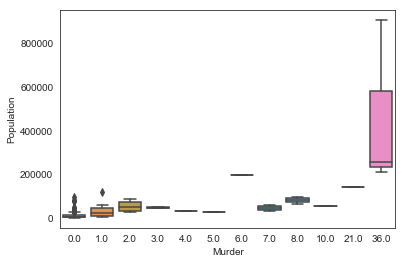

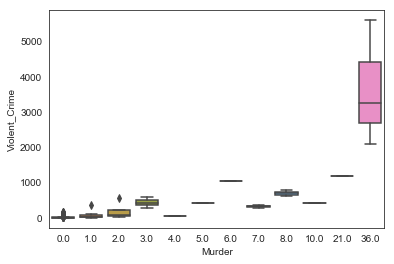

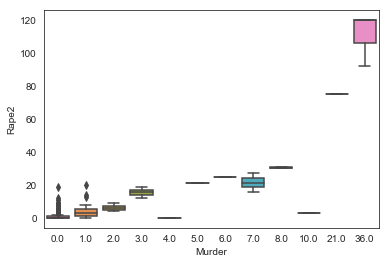

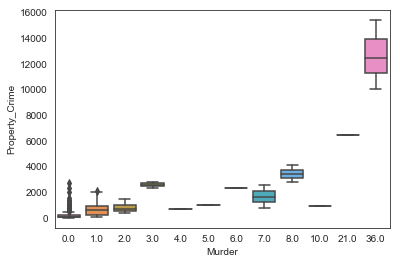

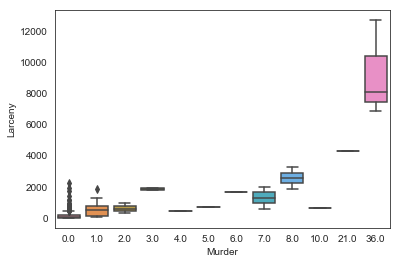

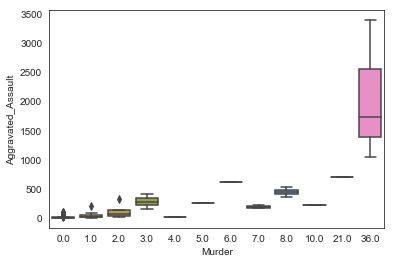

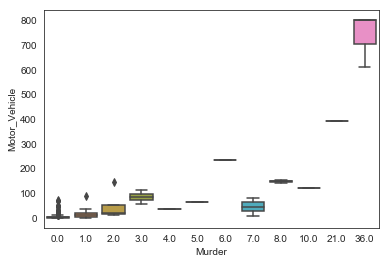

In [21]:
# Look at bivariate relationships of predictors to murder outcome.
sns.boxplot(x="Murder", y="Population", data=df_fbi)
plt.show()
sns.boxplot(x="Murder", y="Violent_Crime", data=df_fbi)
plt.show()
sns.boxplot(x="Murder", y="Rape2", data=df_fbi)
plt.show()
sns.boxplot(x="Murder", y="Property_Crime", data=df_fbi)
plt.show()
sns.boxplot(x="Murder", y="Larceny", data=df_fbi)
plt.show()
sns.boxplot(x="Murder", y="Aggravated_Assault", data=df_fbi)
plt.show()
sns.boxplot(x="Murder", y="Motor_Vehicle", data=df_fbi)
plt.show()

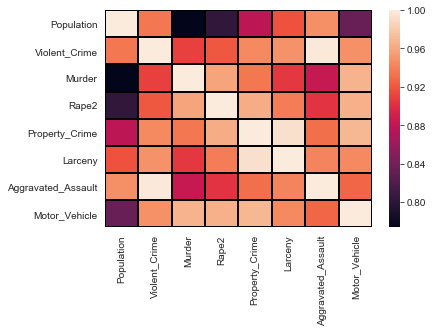

In [22]:
sns.heatmap(df_fbi.corr(), linewidths=1, linecolor='black')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


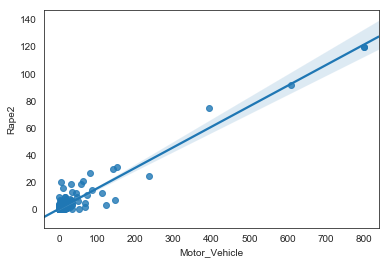

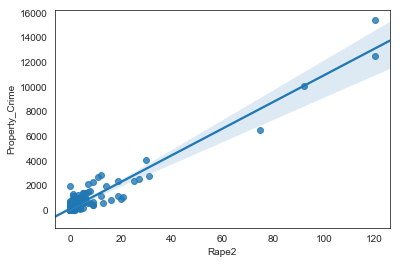

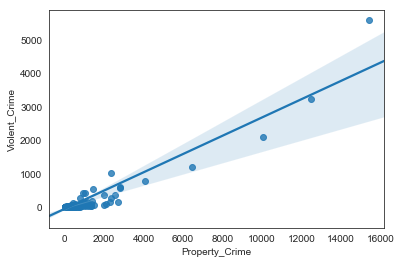

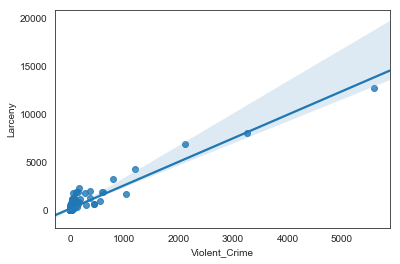

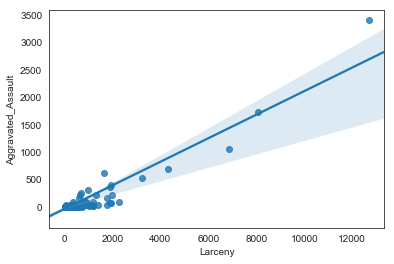

In [23]:
# Relationships between predictors.
sns.regplot(x='Motor_Vehicle', y='Rape2', data=df_fbi)
plt.show()
sns.regplot(x='Rape2', y='Property_Crime', data=df_fbi)
plt.show()
sns.regplot(x='Property_Crime', y='Violent_Crime', data=df_fbi)
plt.show()
sns.regplot(x='Violent_Crime', y='Larceny', data=df_fbi)
plt.show()
sns.regplot(x='Larceny', y='Aggravated_Assault', data=df_fbi)

In [24]:
# Define X and Y.
X = df_fbi[['Motor_Vehicle', 'Rape2', 'Property_Crime', 'Violent_Crime', 'Larceny', 'Aggravated_Assault']]
Y = df_fbi[['Murder']]

In [25]:
# Create train and test variables.
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

In [26]:
# Declare and fit model.
lr = LogisticRegression(C=10)
fit = lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C.
lr = LogisticRegression(C=1e9)
y = df_fbi['Murder']
X = df_fbi[['Motor_Vehicle', 'Rape2']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[-0.03493431 -0.2157796 ]
 [-0.01668632  0.10664289]
 [ 0.02352745 -0.14193072]
 [-0.01572508  0.1263713 ]
 [ 0.14133748 -6.70802601]
 [-0.0492651   0.3271875 ]
 [ 0.06954072 -0.4169689 ]
 [-0.07450502  0.46852757]
 [-0.03393155  0.25450192]
 [ 0.59511848 -8.28422984]
 [-0.29928163  2.36411662]
 [ 0.12467809 -0.40168905]]
[  2.86846155  -2.40937434  -4.54307972  -5.45334328  -6.88431414
  -7.25095256  -8.12529234  -7.79292123  -6.19551355 -38.99611323
 -52.53731218 -29.08133633]

 Accuracy by admission status
Murder  0.000   1.000   2.000   3.000   4.000   5.000   6.000   7.000   \
row_0                                                                    
0.000      298      29       3       0       1       0       0       0   
1.000        1       1       0       2       0       1       0       2   
6.000        0       0       1       0       0       0       1       0   
7.000        0       1       0       0       0       0       0       0   
10.000       0       0     

In [28]:
# Define training and test sizes.
trainsize = int(df.shape[0] / 2)
df_fbi_test = df_fbi.iloc[trainsize:, :].copy()
df_fbi_train = df_fbi.iloc[:trainsize, :].copy()

y_train = df_fbi_train['Murder'].values.reshape(-1, 1)
X_train = df_fbi_train.loc[:, ~(df_fbi_train.columns).isin(['Murder'])]

# Ridge regression.
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train, y_train)
print(ridgeregrBig.score(X_train, y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.9827649723566099
[ 9.80037707e-06  4.11050034e-02 -3.57063079e-02 -7.42979663e-03
  7.47909399e-03 -3.25825741e-02 -8.15659855e-03]
0.9827649723566099

Parameter Estimates for the same predictors for the small model and large model:
[[0.000 0.000]
 [0.041 0.041]
 [-0.036 -0.036]
 [-0.007 -0.007]
 [0.007 0.007]
 [-0.033 -0.033]
 [-0.008 -0.008]]


In [29]:
# Lasso Regression
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)
print('R² for the model with few features:')
print(lass.score(X_train, y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train, y_train)
print('\nR² for the model with many features:')
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.9783681229444013

Parameter estimates for the model with few features:
[ 1.57705114e-05  1.71825395e-02 -0.00000000e+00 -3.21278583e-03
  2.11715486e-03 -2.28676787e-03  4.25713630e-03 -2.09178077e-03]

R² for the model with many features:

Parameter estimates for the model with many features:
[ 1.57705114e-05  1.71825395e-02 -0.00000000e+00 -3.21278583e-03
  2.11715486e-03 -2.28676787e-03  4.25713630e-03 -2.09178077e-03]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The logistical regression was very effective, with a 87.64% accuracy.  The Lasso regression was even better with a 97.84% accuracy.  But the Ridge regression was the most accurate with a 98.28% accuracy.